# New topography

conda env: new `phd_v3` (in `envs/phd`)

## [GMTED2010](http://www.temis.nl/data/gmted2010/ ) versus Relief.nc with clim_360d simulations ([Simu topo](https://docs.google.com/document/d/10uWTBB1ZHW-EvPgrc6YLzlzYHLmT3NXmUjwgm35B4R0/edit?usp=sharing))

[https://github.com/mickaellalande/PhD/tree/master/CICLAD/Himalaya/clim-relief](https://github.com/mickaellalande/PhD/tree/master/CICLAD/Himalaya/clim-relief) 

`/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-GMTED2010-00625deg/`

`/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-GMTED2010-def/`

(copies depuis le $STORE de Jean-Zay)

See for more: [Topography](https://docs.google.com/document/d/1ieORG49nGEnJHfUKwj7mpK3_cjWST8fEnwGZxgs_Isg/edit?usp=sharing) 

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [2]:
xr.__version__

'0.16.0'

# Get orography from the variables phis

In [3]:
# Just to get a "normal" grid
relief_CMIP6 = xr.open_dataarray('/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').load()

In [4]:
def get_topo(grilles_gcm_path, topo_CMIP6):
    phis = xr.open_dataset(grilles_gcm_path).phis
    topo = topo_CMIP6.copy()
    topo.values = phis[:,:-1].roll(lonv=int(topo_CMIP6.lon.size/2), roll_coords=True).sortby('latu').values
    return topo

In [5]:
relief_def = get_topo('/data/mlalande/ELC-144x142x79_clim/Output/Grid/ELC-144x142x79_grilles_gcm.nc', relief_CMIP6)
relief_GMTED2010_00625deg = get_topo('/data/mlalande/ELC-144x142x79-GMTED2010-00625deg/ATM/Output/Grid/ELC-144x142x79-GMTED2010-00625deg_grilles_gcm.nc', relief_CMIP6)

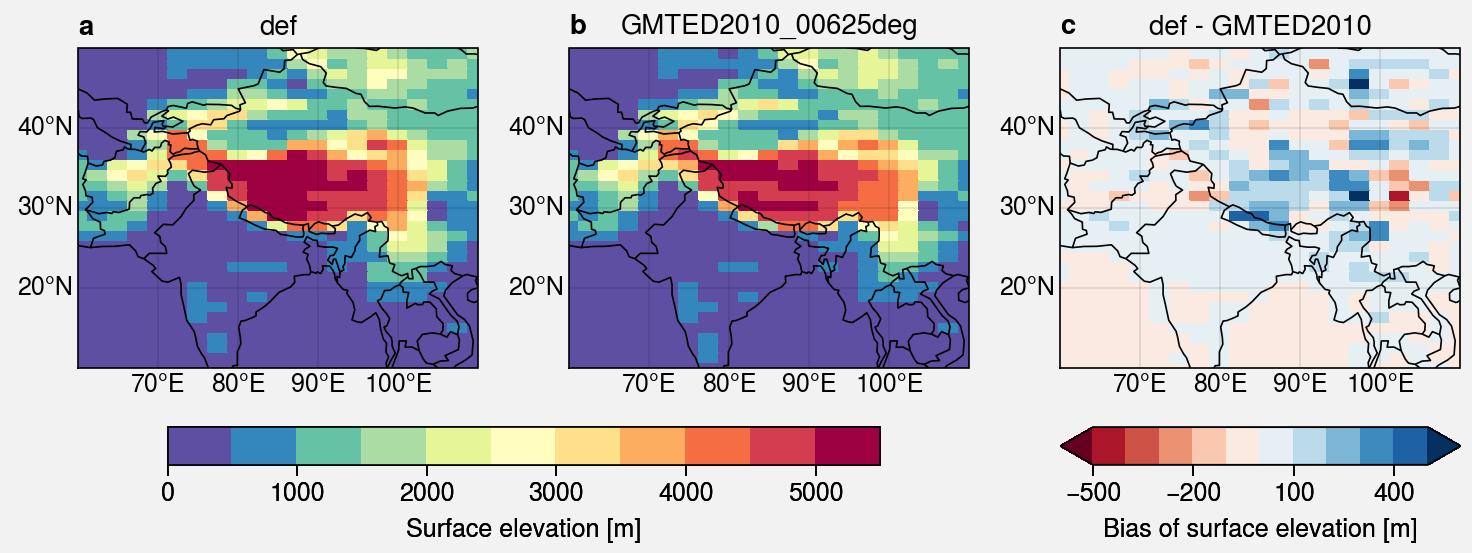

In [14]:
levels=plot.arange(0,5500,500)
cmap='Spectral_r'
extend='neither'

levels_bias=plot.arange(-500,500,100)
cmap_bias='BuRd_r'
extend_bias='both'

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=1, axwidth=2)

m1 = axs[0].pcolormesh(relief_def.sel(lat=slice(10,50), lon=slice(60,110)), levels=levels, cmap=cmap, extend=extend)
axs[0].format(title='def')

axs[1].pcolormesh(relief_GMTED2010_00625deg.sel(lat=slice(10,50), lon=slice(60,110)), levels=levels, cmap=cmap, extend=extend)
axs[1].format(title='GMTED2010_00625deg')

m2 = axs[2].pcolormesh((relief_def-relief_GMTED2010_00625deg).sel(lat=slice(10,50), lon=slice(60,110)), levels=levels_bias, cmap=cmap_bias, extend=extend_bias)
axs[2].format(title='def - GMTED2010')

f.colorbar(m1, label='Surface elevation [m]', loc='b', cols=(1,2), length=0.8)
f.colorbar(m2, label='Bias of surface elevation [m]', loc='b', col=3)

axs.format(
    labels=True, borders=True, coast=True, abc=True,
    lonlines=10, latlines=10, latlim=(10,50), lonlim=(60,110)
)

f.savefig('img/compare_topography.jpg')

# tas

# Check model data

In [16]:
var_LMDZ = 't2m'
folder_LMDZ = 'ATM'

# Define common period (remove 2 years at the beginning)
period = slice('1981','1989')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'tas'
label = 'Near-Surface Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-30,30,5)

In [17]:
path_GMTED2010 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-GMTED2010-00625deg/'+folder_LMDZ+'/Output/MO'
model_GMTED2010 = xr.open_mfdataset(path_GMTED2010+'/*.nc', combine='by_coords')[var_LMDZ]
model_GMTED2010

<xarray.DataArray 't2m' (time_counter: 132, lat: 143, lon: 144)>
dask.array<concatenate, shape=(132, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_instant   (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 0...
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    long_name:           Temperature 2m
    units:               K
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

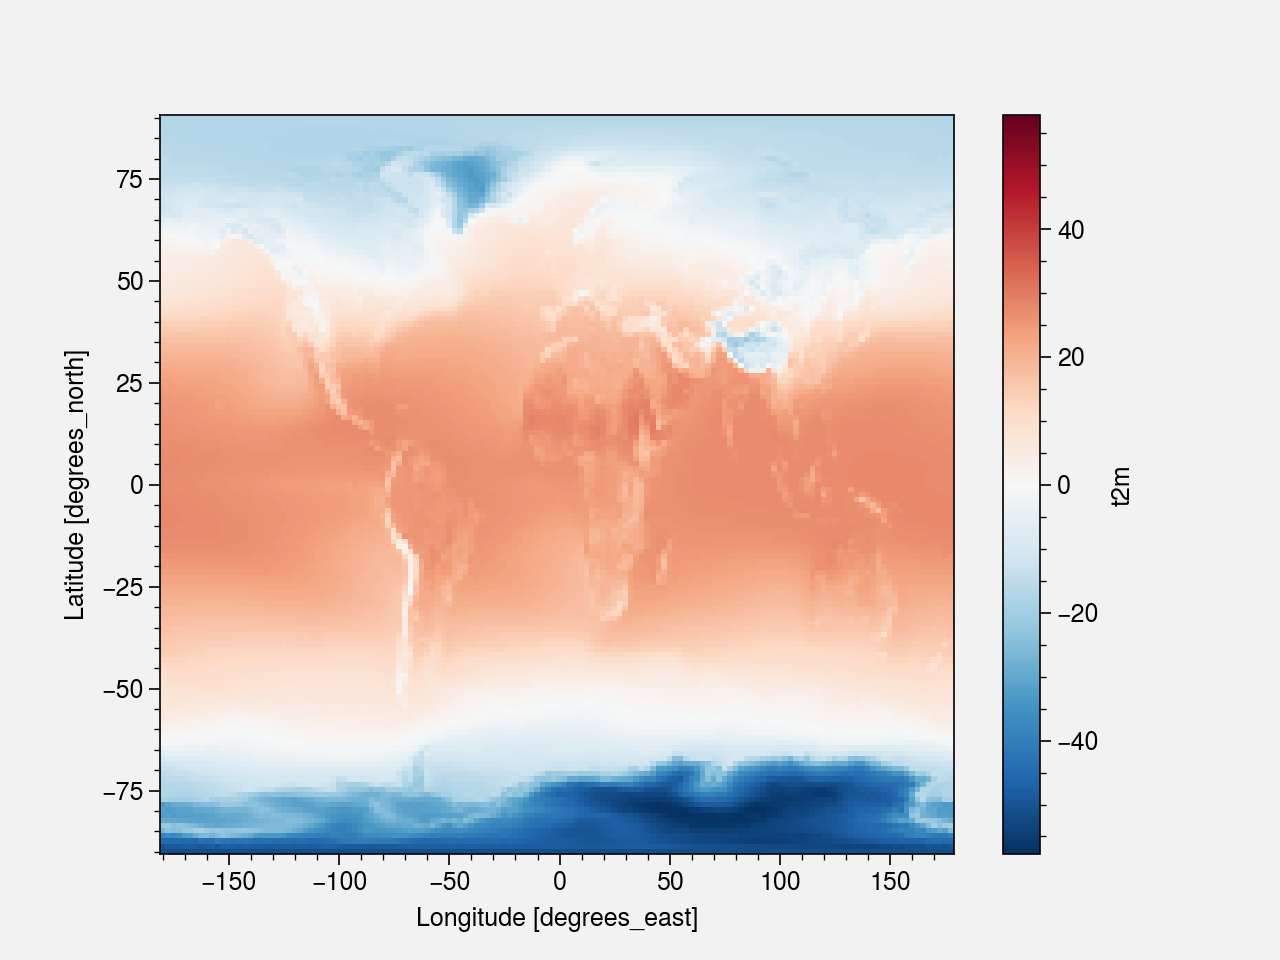

In [18]:
model_GMTED2010_clim = model_GMTED2010.sel(time_counter=period).mean('time_counter') - 273.15
model_GMTED2010_clim.plot()

In [19]:
path_def = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def/'+folder_LMDZ+'/Output/MO'
model_def = xr.open_mfdataset(path_def+'/*.nc', combine='by_coords')[var_LMDZ]
model_def

<xarray.DataArray 't2m' (time_counter: 144, lat: 143, lon: 144)>
dask.array<concatenate, shape=(144, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_instant   (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1991-12-16 0...
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    long_name:           Temperature 2m
    units:               K
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

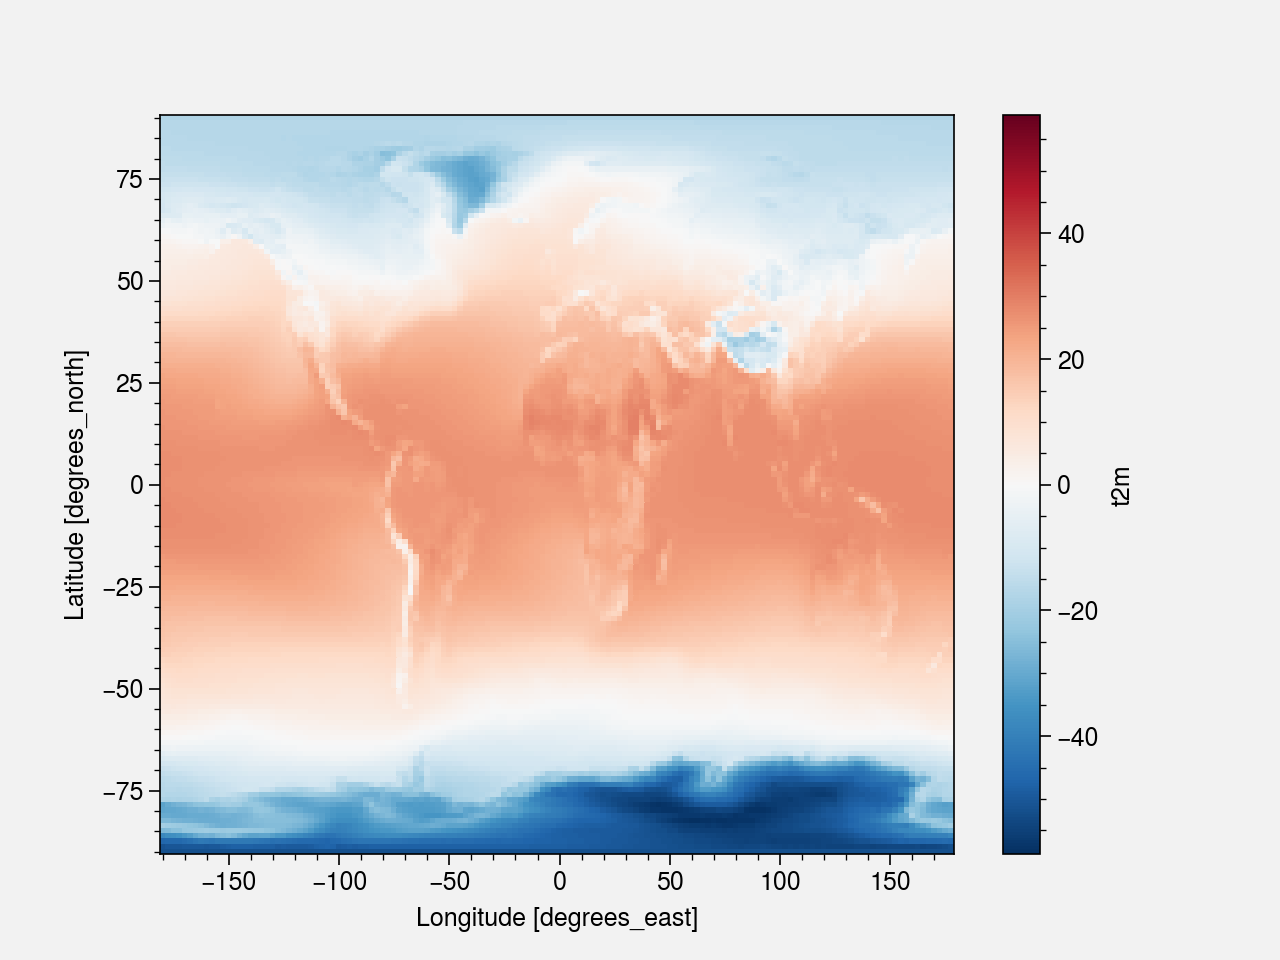

In [20]:
model_def_clim = model_def.sel(time_counter=period).mean('time_counter') - 273.15
model_def_clim.plot()

# Load obs
## cru_ts4.00
More recent version available: https://crudata.uea.ac.uk/cru/data/hrg/  
-> pas évident à télécharger encore... les netCDF ne sont pas reconnus directement, je vais rester du coup sur la version 4.00 sur CICLAD

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Temperature.ipynb

In [21]:
period_clim = slice('1979', '2008')

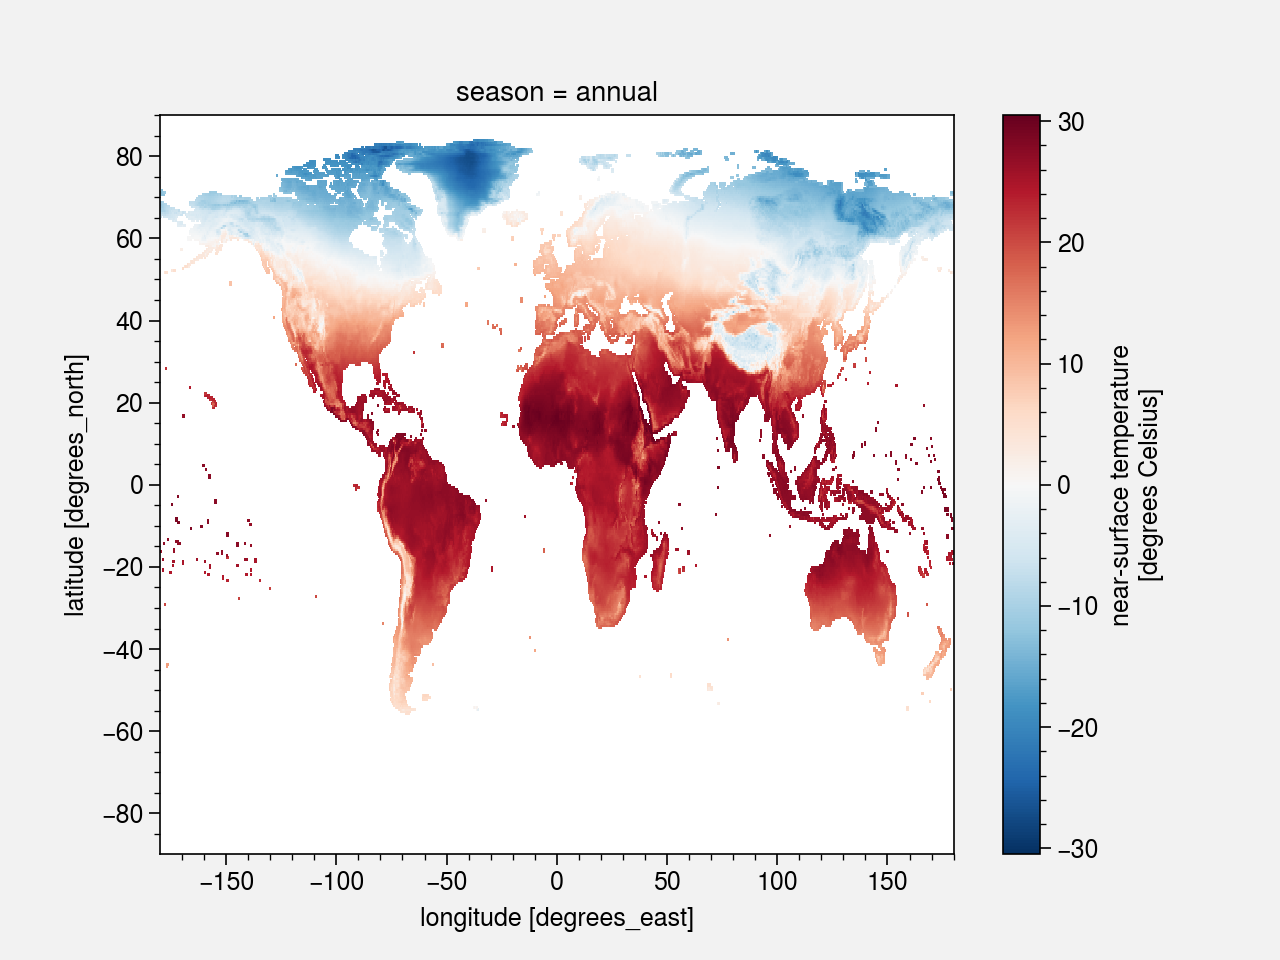

In [22]:
obs_longname = 'CRU TS v. 4.00'
obs_name = 'CRU'

obs = xr.open_dataset('/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.1901.2015.tmp.dat.nc').sel(time=period_clim).tmp
obs_clim = u.clim(obs, calendar=obs.time.encoding['calendar'])
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

In [23]:
regridder_obs = xe.Regridder(obs_clim, model_def_clim, 'bilinear', periodic=True, reuse_weights=False)
obs_clim_regrid = regridder_obs(obs_clim)

Overwrite existing file: bilinear_360x720_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


# Plot differences

In [24]:
latlim, lonlim = u.get_zone('HMA')

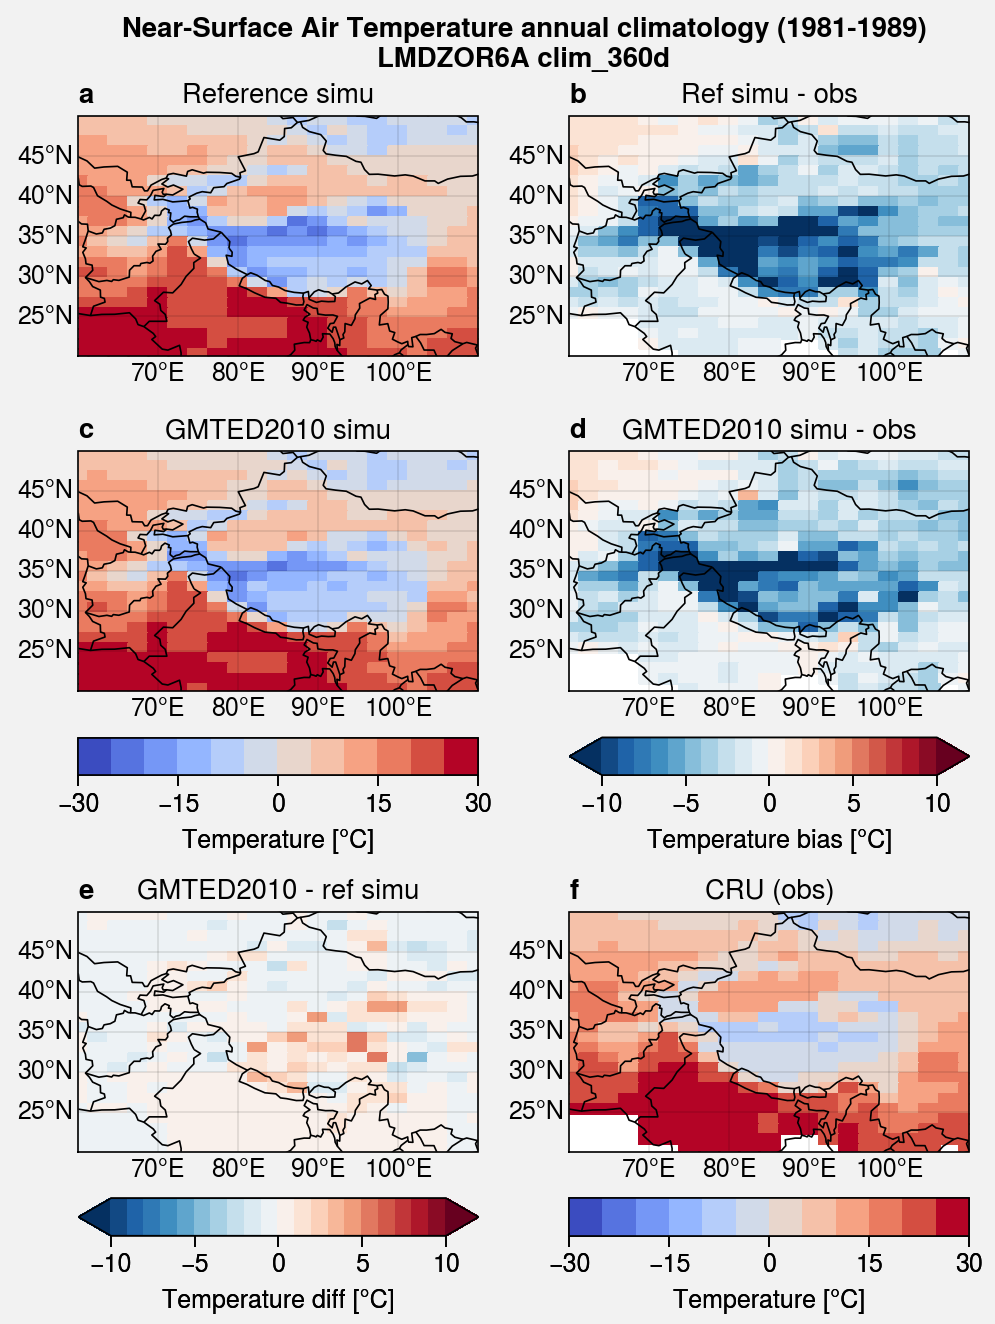

In [25]:
fig, axs = plot.subplots(ncols=2, nrows=3, proj='cyl', axwidth=2)

cmap = 'CoolWarm'
cmap_bias = 'RdBu_r'
levels = plot.arange(-30, 30, 5)
levels_bias = plot.arange(-10, 10, 1)


# Ref
axs[0].pcolormesh(model_def_clim, cmap=cmap, levels=levels)
axs[0].format(title='Reference simu')

# Ref - obs
axs[1].pcolormesh(model_def_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend='both')
axs[1].format(title='Ref simu - obs')

# New
m1 = axs[2].pcolormesh(model_GMTED2010_clim, cmap=cmap, levels=levels)
axs[2].format(title='GMTED2010 simu')

# New - obs
m4 = axs[3].pcolormesh(model_GMTED2010_clim - obs_clim_regrid, cmap=cmap_bias, levels=levels_bias, extend='both')
axs[3].format(title='GMTED2010 simu - obs')

# New - ref
m2 = axs[4].pcolormesh(model_GMTED2010_clim - model_def_clim, cmap=cmap_bias, levels=levels_bias, extend='both')
axs[4].format(title='GMTED2010 - ref simu')
axs[4].colorbar(m2, label='Temperature diff [°C]', loc='b')


# Obs
axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='CRU (obs)')
axs[5].colorbar(m1, label='Temperature [°C]', loc='b')

axs[2].colorbar(m1, label='Temperature [°C]', loc='b')
axs[3].colorbar(m4, label='Temperature bias [°C]', loc='b')

axs.format(
    latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop),
    labels=True, abc=True, borders=True, coast=True,
    suptitle='Near-Surface Air Temperature annual climatology (1981-1989)\nLMDZOR6A clim_360d'
)

fig.save('img/LMDZOR6A_clim_360d_relief_tas_HMA.jpg')

# snc

In [26]:
var_LMDZ = 'frac_snow'
folder_LMDZ = 'SRF'

# Define common period (remove 2 years at the beginning)
period = slice('1981','1989')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

In [27]:
path_GMTED2010 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-GMTED2010-00625deg/'+folder_LMDZ+'/Output/MO'
model_GMTED2010 = xr.open_mfdataset(path_GMTED2010+'/*.nc', combine='by_coords')[var_LMDZ]
model_GMTED2010

<xarray.DataArray 'frac_snow' (time_counter: 132, lat: 143, lon: 144)>
dask.array<concatenate, shape=(132, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 0...
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


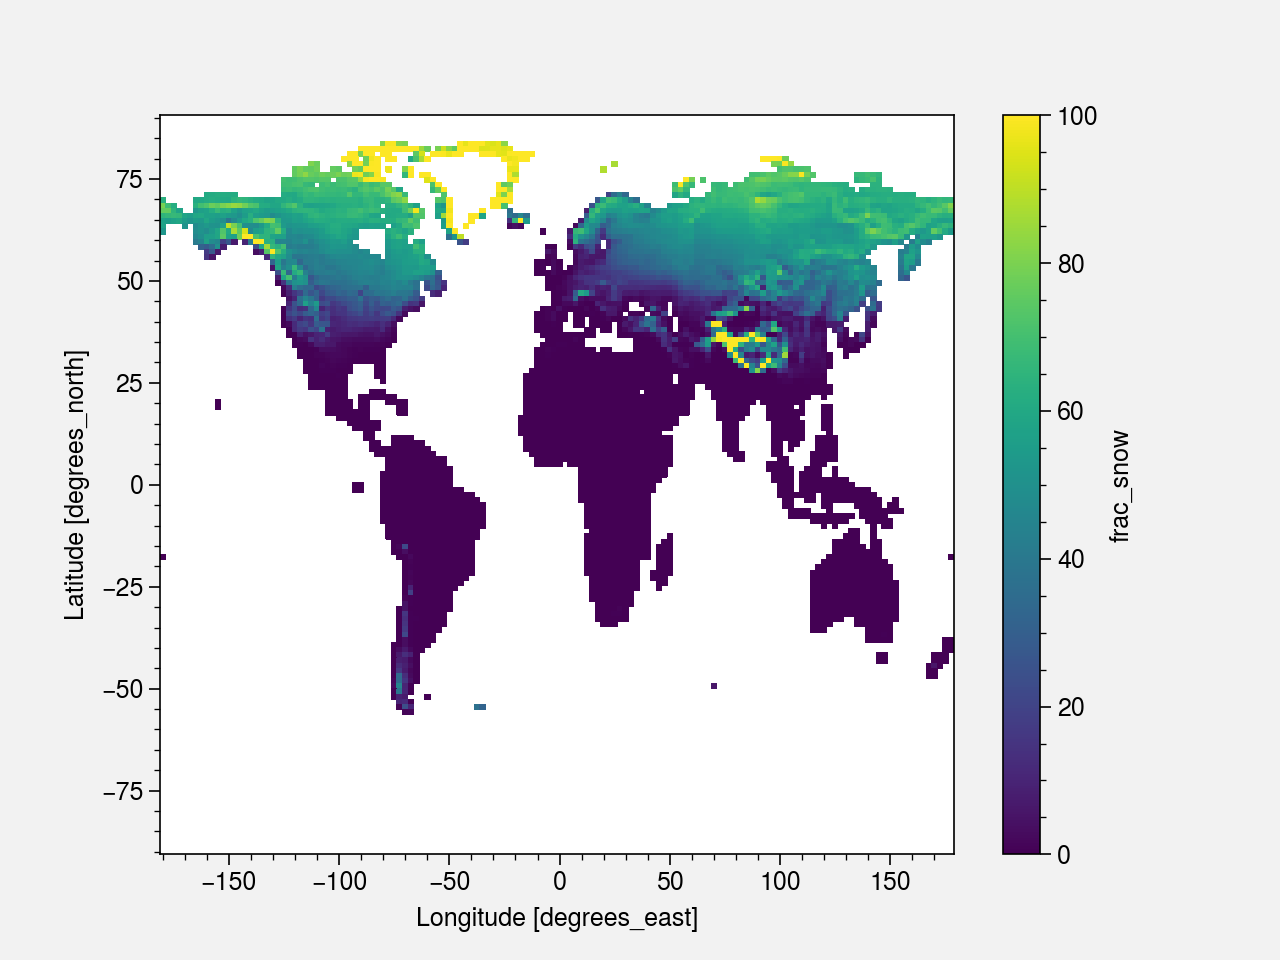

In [28]:
model_GMTED2010_clim = model_GMTED2010.sel(time_counter=period).mean('time_counter')
model_GMTED2010_clim.plot()

In [29]:
path_def = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def/'+folder_LMDZ+'/Output/MO'
model_def = xr.open_mfdataset(path_def+'/*.nc', combine='by_coords')[var_LMDZ]
model_def

<xarray.DataArray 'frac_snow' (time_counter: 132, lat: 143, lon: 144)>
dask.array<concatenate, shape=(132, 143, 144), dtype=float32, chunksize=(12, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1990-12-16 0...
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


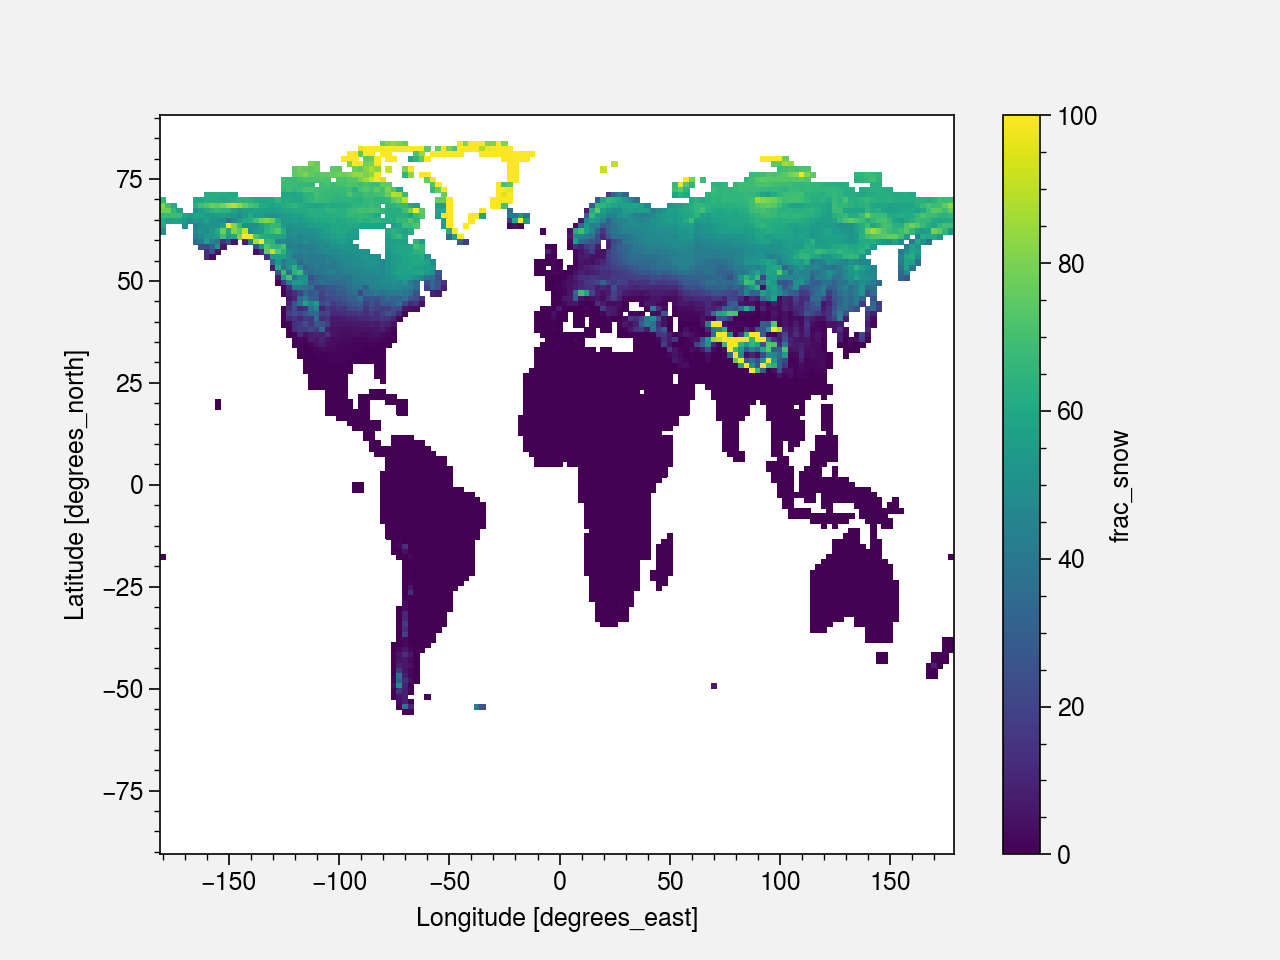

In [30]:
model_def_clim = model_def.sel(time_counter=period).mean('time_counter')
model_def_clim.plot()

# Load obs

### ESA snow CCI AVHRR (linear interpolation 10 days maxgap)
https://github.com/mickaellalande/PhD/blob/master/local/ESA_CCI_snow/snowCCI_preprocess_AVHRR_gricad_v1.ipynb

Mois manquant en 1994/1995 mais ok ici, commence en 1982 (donc 1 an de moins mais ok ici)

In [31]:
period_clim = slice('1979', '2008')

In [32]:
root_data_path = '/data/mlalande/'
ds = xr.open_mfdataset(root_data_path+'ESA_CCI_SNOW/preprocess/scfg/AVHRR_MERGED/v2.0/monthly_1deg/*.nc').sel(time=period_clim)
# Check if the time steps are ok
# np.testing.assert_equal((int(period.stop) - int(period.start) + 1)*12, ds.time.size)
# démarre en 1982

snow_cci_interp = ds['scfg_interp_1deg_icefilled']
snow_cci_interp = snow_cci_interp.reindex(time=pd.date_range('1982-01-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000', freq='M')) # reindex to add dates from nov 1994 to jan 1995
snow_cci_interp.load()
snow_cci_interp.loc['1994-10'] = snow_cci_interp.loc['1994-11'].values

In [33]:
regridder = xe.Regridder(snow_cci_interp, model_def_clim, 'bilinear', periodic=True, reuse_weights=False)
snow_cci_interp_regrid = regridder(snow_cci_interp)

Overwrite existing file: bilinear_180x360_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


In [34]:
snow_cci_interp_regrid_clim = snow_cci_interp_regrid.groupby('time.month').mean().mean('month')
snow_cci_interp_regrid_clim.load()

/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'scfg_interp_1deg_icefilled' (lat: 143, lon: 144)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0

In [35]:
latlim, lonlim = u.get_zone('HMA')

/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/.conda/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


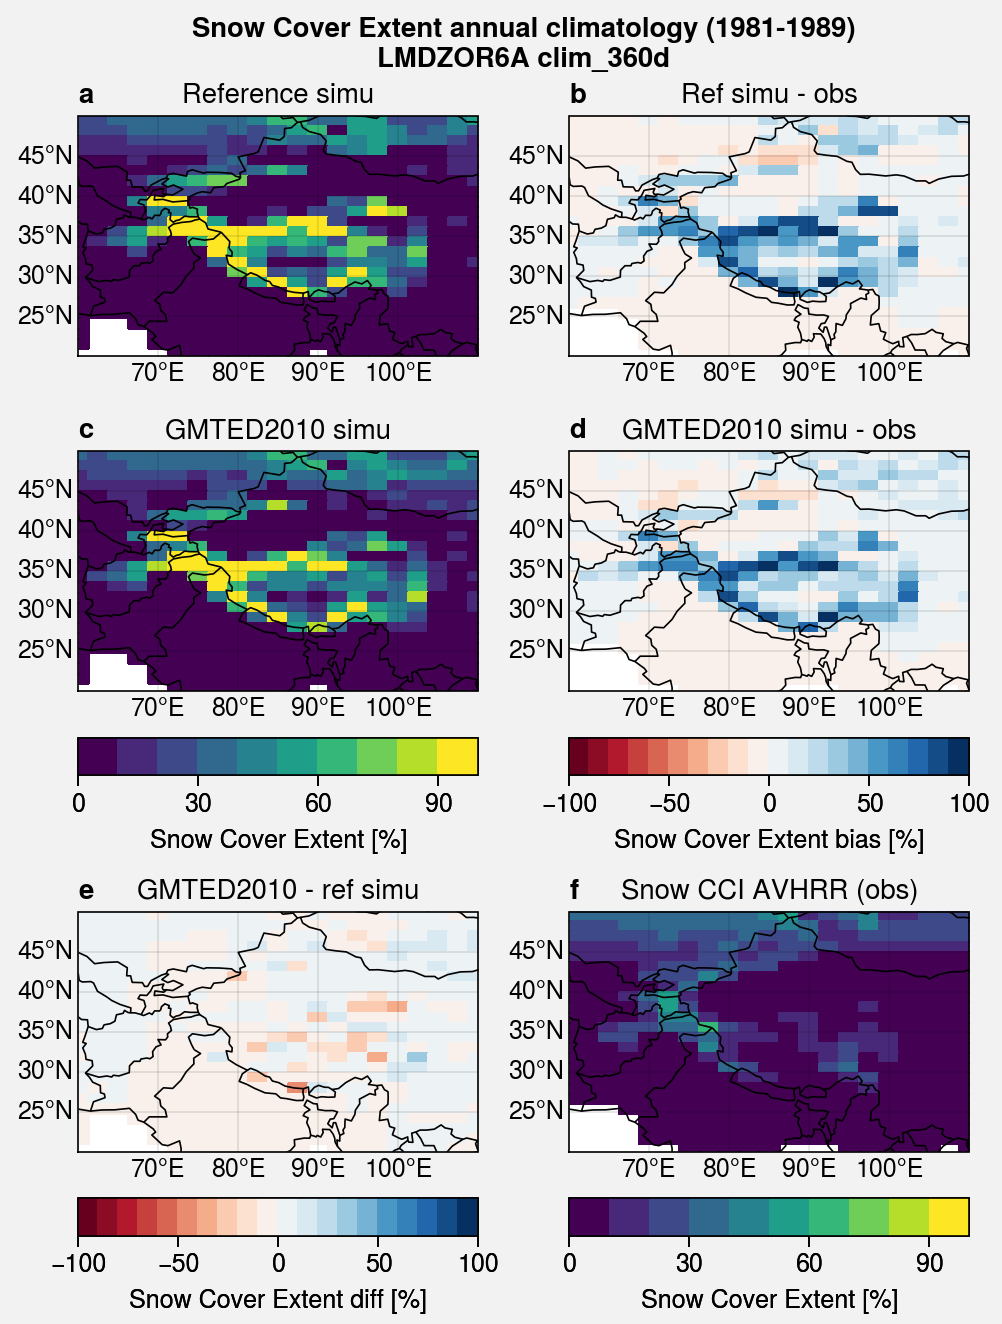

In [36]:
fig, axs = plot.subplots(ncols=2, nrows=3, proj='cyl', axwidth=2)

cmap = 'viridis'
cmap_bias = 'RdBu'
levels = plot.arange(0, 100, 10)
levels_bias = plot.arange(-100, 100, 10)


# Ref
axs[0].pcolormesh(model_def_clim, cmap=cmap, levels=levels)
axs[0].format(title='Reference simu')

# Ref - obs
axs[1].pcolormesh(model_def_clim - snow_cci_interp_regrid_clim, cmap=cmap_bias, levels=levels_bias)
axs[1].format(title='Ref simu - obs')

# New
m1 = axs[2].pcolormesh(model_GMTED2010_clim, cmap=cmap, levels=levels)
axs[2].format(title='GMTED2010 simu')

# New - obs
m4 = axs[3].pcolormesh(model_GMTED2010_clim - snow_cci_interp_regrid_clim, cmap=cmap_bias, levels=levels_bias)
axs[3].format(title='GMTED2010 simu - obs')

# New - ref
m2 = axs[4].pcolormesh(model_GMTED2010_clim - model_def_clim, cmap=cmap_bias, levels=levels_bias)
axs[4].format(title='GMTED2010 - ref simu')
axs[4].colorbar(m2, label='Snow Cover Extent diff [%]', loc='b')


# Obs
axs[5].pcolormesh(snow_cci_interp_regrid_clim, cmap=cmap, levels=levels)
axs[5].format(title='Snow CCI AVHRR (obs)')
axs[5].colorbar(m1, label='Snow Cover Extent [%]', loc='b')

axs[2].colorbar(m1, label='Snow Cover Extent [%]', loc='b')
axs[3].colorbar(m4, label='Snow Cover Extent bias [%]', loc='b')

axs.format(
    latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop),
    labels=True, abc=True, borders=True, coast=True,
    suptitle='Snow Cover Extent annual climatology (1981-1989)\nLMDZOR6A clim_360d'
)

fig.save('img/LMDZOR6A_clim_360d_relief_snc_HMA.jpg')